1.	Download two CSV files and place them in the data folder of your local Data Question 1 repository:
a. Gross Domestic Product (GDP) per capita: http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD
o	DO NOT APPLY ANY FILTERS
o	rename the file to gdp_per_capita.csv
o	open it with a text editor (not Excel) and take a look
b. Percentage of Individuals using the Internet: http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H
o	DO NOT APPLY ANY FILTERS
o	rename the file to internet_use.csv
o	open it with a text editor (not Excel) and take a look



2.	Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

4.	At the bottom of your imports cell, use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

5.	Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
o	Take a look at the first 10 rows.
o	Look at the last 5 rows. Do you see a problem?
o	Redo the read_csv() call to correct this issue - do not modify the original csv file.


In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows = 6868)


In [3]:
# anotehr way to do this

In [4]:
#gdp_df.drop([6868, 6969]) # here the indices are number, they could be strings. 

In [5]:
#del gdp_df[6868:] [[6868, 6869]]

In [6]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [7]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [8]:
gdp_df['Country or Area'].value_counts()

Israel                                        30
Russia                                        30
Sub-Saharan Africa (excluding high income)    30
Mexico                                        30
Madagascar                                    30
                                              ..
Nauru                                         16
Cayman Islands                                13
Sint Maarten (Dutch part)                     10
Turks and Caicos Islands                       9
Djibouti                                       7
Name: Country or Area, Length: 238, dtype: int64

6.	Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [9]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [10]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [11]:
gdp_df.tail()

,Country or Area,Year,Value
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094
6867,Zimbabwe,1990,3324.348171


In [24]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [25]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


7.	How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [28]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [27]:
# gdp_df['Year'].astype(int): convert data type to integer

8.	Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [31]:
gdp_df.Year.value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

In [16]:
gdp_df.Year.unique()

# this is better than .tolist() and .value_counts() because it puts everything in a list

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

<AxesSubplot:>

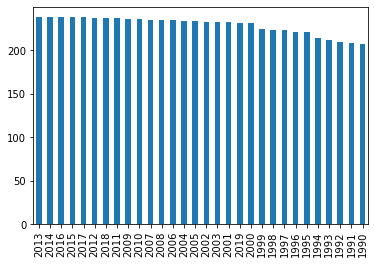

In [18]:
year = gdp_df.Year.value_counts()
year.plot(kind = 'bar') # bar plot is made from value counts

9.	How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [56]:
gdp_df.Country.nunique()

238

In [ ]:
# nunique gives you the number of unique values for the column...

In [58]:
len(gdp_df.Country.unique()) # unique gives me a list. we wanna count the elements of a list

238

In [ ]:
# len does the same things for counting the number of elements in a list

10.	Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [72]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014].reset_index(drop = True) # make a new data drame

In [73]:
gdp_2014

,Country,Year,GDP_Per_Capita
0,Afghanistan,2014,2102.385234
1,Albania,2014,11623.866679
2,Algeria,2014,11512.705405
3,Angola,2014,8239.828837
4,Antigua and Barbuda,2014,18104.241470
...,...,...,...
233,Vietnam,2014,6098.489609
234,West Bank and Gaza,2014,5967.073437
235,World,2014,15189.648507
236,Zambia,2014,3450.046561


11.	Use .describe() to find the summary statistics for GDP per capita in 2014.


In [74]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


12.	Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

Text(0.5, 0, 'GPD')

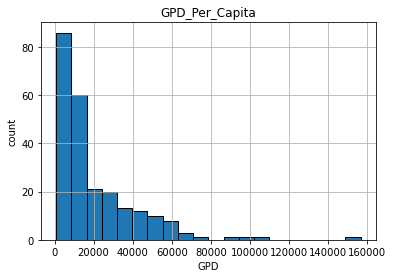

In [85]:
gdp_2014.GDP_Per_Capita.hist(bins = 20, edgecolor = 'black')
plt.title('GPD_Per_Capita')
plt.ylabel('count')
plt.xlabel('GPD')

In [79]:
# Right skewed: tail is to the right. with some outliers to the right

13.	Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [90]:
gdp_2014.sort_values('GDP_Per_Capita').head() # you can add b= in the paranthesisi but optional

,Country,Year,GDP_Per_Capita
36,Central African Republic,2014,822.610458
28,Burundi,2014,886.235777
130,Malawi,2014,1027.208496
49,Dem. Rep. Congo,2014,1029.790785
156,Niger,2014,1127.615541


In [93]:
gdp_2014.sort_values(by = 'GDP_Per_Capita').tail() # to find the buttom values first sort valuesby 

,Country,Year,GDP_Per_Capita
19,Bermuda,2014,77361.104881
189,Singapore,2014,87808.663157
177,Qatar,2014,95578.416973
127,Luxembourg,2014,108760.916030
128,"Macao SAR, China",2014,156514.133850


14.	Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [104]:
gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')[1990] #series

Country
Afghanistan                     NaN
Albania                 4842.734635
Algeria                 8746.352901
Angola                  5783.429064
Antigua and Barbuda    15459.551675
                           ...     
Vietnam                 1673.249634
West Bank and Gaza              NaN
World                   9680.269697
Zambia                  2190.182814
Zimbabwe                3324.348171
Name: 1990, Length: 238, dtype: float64

In [105]:
gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')[[1990]]

Year,1990
Country,
Afghanistan,NaN
Albania,4842.734635
Algeria,8746.352901
Angola,5783.429064
Antigua and Barbuda,15459.551675
...,...
Vietnam,1673.249634
West Bank and Gaza,NaN
World,9680.269697


In [120]:
gdp_pivoted = gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')[[1990, 2017]].dropna() # bracket gives a data drame into specific columns

In [103]:
#gdp_df.groupby(['Country'])['GDP_Per_Capita']

In [121]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


15.	Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [129]:
gdp_pivoted['Percent_change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [130]:
gdp_pivoted

Year,1990,2017,Percent_change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385518,67.902197


16.	How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [135]:
gdp_pivoted[gdp_pivoted['Percent_change'] < 0].sort_values('Percent_change')

Year,1990,2017,Percent_change
Country,,,
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
United Arab Emirates,111454.360446,67183.626557,-39.720953
Burundi,1184.842440,773.571858,-34.710993
Ukraine,15751.722440,11871.123624,-24.636028
Central African Republic,1201.677234,912.802052,-24.039332
Tajikistan,3869.043636,3089.530208,-20.147445
Gabon,18179.265733,15006.764091,-17.451209
Congo,5115.210903,4274.296414,-16.439488
Madagascar,1853.051624,1584.422678,-14.496571


In [133]:
len(gdp_pivoted[gdp_pivoted['Percent_change'] < 0].sort_values('Percent_change'))

17

17.	Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.


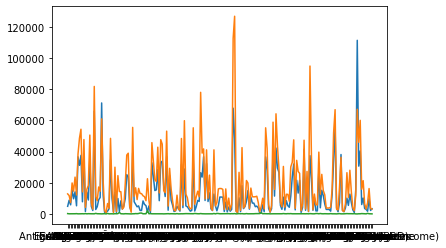

In [136]:
gplt.plot(gdp_pivoted)

18.	Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

19.	Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

20.	Determine the number of countries per continent. Create a bar chart showing this.

21.	Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

22.	Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

23.	Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

24.	How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

25.	What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

26.	Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.



Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.